<a href="https://colab.research.google.com/github/MRROOX/mii-analisis-de-datos/blob/master/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para la tarea se deben utilizar las siguientes bases de datos:

* Iris https://archive.ics.uci.edu/ml/datasets/Iris
* MNIST http://yann.lecun.com/exdb/mnist/


Se recomienda hacer uso de las librerias de python indicadas en la conferencia (tener en cuentas al respecto
las funciones. fit, predict y predict proba asociadas). También es válido (pero más trabajoso) implementar
directamente la optimización asociada a los modelos, o utilizar librerı́as de R.
Las actividades solicitadas (junto con una descripción metodológica) son las siguientes:


**1. Entrenar los modelos estudiados para la base de datos Iris involucrando todas las variables.**

* Resolver los tres modelos presentados (Perceptron, Adaline y Regresión logı́stica) para la base de
datos Iris incluyendo las cuatro variables explicativas (sepal length, sepal width, petal length y petal
width) y dos de las tres categoı́as de flores (se reduce a 100 datos con 4 caracterı́sticas y dos clases).



**2. Estudiar la base de datos MINST y entrenar dos modelos (Adaline y Regresión logı́stica) para dos pro-
blemas de clasificación binaria (por ejemplo 3 vs. 3, pares vs no pares, etc.)**

* Tomar los datos de MNIST y preparar dos problemas de clasificación binarios, lo cual implica generar
la clase asociada a todas las observaciones (para cada problemas deben quedar 60.000 datos con 784
caracterı́sticas y dos clases)
* Entrenar los dos modelos mencionados anteriormente para los problemas de clasificación binaria
propuestos.

**3. En ambos casos (1 y 2) estudiar el número de aciertos del modelo en los datos de entrenamiento y probar
con distintos valores de corte.**
* Para todos los modelos entrenados en los puntos 1 y 2 calcular el porcentaje de aciertos en la
clasificación de todos los datos de entrenamiento.
* Para los modelos entrenados de tipo Adaline y Regresión Logı́stica preparar predictores con tres
valores de corte distintos, y comparar el porcentaje de aciertos de los predictores.

**4. Entrenar los modelos en los ejemplos anteriores con distintos valores del learning rate (entre 0.0001 y
1000) y documentar diferencias observadas.**

* Entrenar los modelos solo de tipo Adaline (SGDRegressor) con varios valores del learning rate y
documentar las diferencias observadas en cuanto a la ejecución del entrenamiento y la calidad del
predictor que se genera (por ejemplo mirando el porcentaje de aciertos).


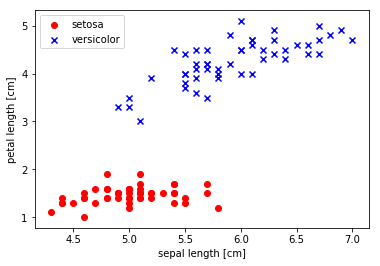

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


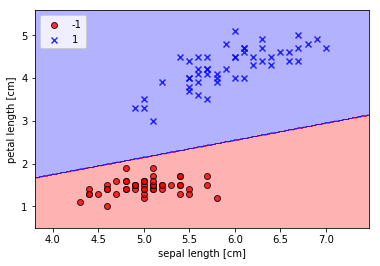

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


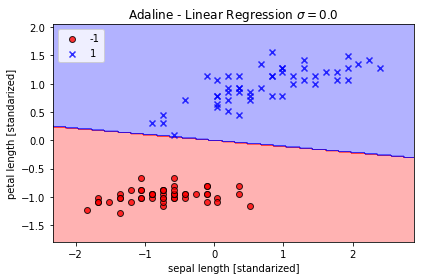

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


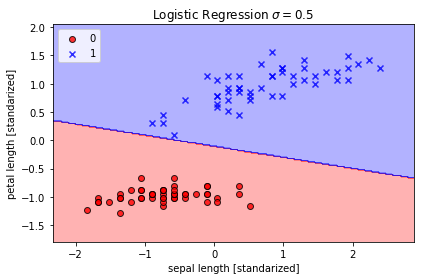

In [0]:
#1. Entrenar los modelos estudiados para la base de datos Iris involucrando todas las variables.
# Cargando los datos Iris

import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data',
                 header=None)

df.columns = ['sepal length', 'sepal width','petal length', 'petal width', 'class']

df.head()

# Separabilidad ploteo de las clases Setosa y Versicolor en las dos variables legth
import matplotlib.pyplot as plt

X_setosa=df.loc[df['class']=='Iris-setosa'].loc[:,['sepal length', 'petal length']].values
X_versicolor=df.loc[df['class']=='Iris-versicolor'].loc[:,['sepal length', 'petal length']].values
X_virginica=df.loc[df['class']=='Iris-virginica'].loc[:,['sepal length', 'petal length']].values


plt.scatter(X_setosa[:,0],X_setosa[:,1], color='red',marker='o', label='setosa')
plt.scatter(X_versicolor[:,0],X_versicolor[:,1], color='blue',marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Perceptron para clases Setosa y Versicolor 


df_setosa_versicolor=df.loc[df['class'].isin(['Iris-setosa','Iris-versicolor'])]
X_setosa_versicolor=df_setosa_versicolor.loc[:,['sepal length', 'petal length']].values
y_setosa_versicolor=np.where(df_setosa_versicolor.loc[:,['class']].values== 'Iris-setosa',-1,1)

from sklearn.linear_model import Perceptron
# Se aplica Perceptron #
ppn=Perceptron(max_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_setosa_versicolor,y_setosa_versicolor)

from matplotlib.colors import ListedColormap


def plot_decision_regions(X,y, classifier, markers=['o','x'],colors=['red','blue'],predict_proba=False,threshold=0.0,resolution=0.02):
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -0.5 ,  X[:,0].max() +0.5
    x2_min, x2_max = X[:,1].min() -0.5,  X[:,1].max() +0.5
    
    xx1, xx2 =np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    if predict_proba:
        Z= classifier.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
        Z=np.where(Z>=threshold,1,0)
    else:
        Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z=np.where(Z>=threshold,1,-1)
    
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
plot_decision_regions(X_setosa_versicolor,y_setosa_versicolor.ravel(), classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaline - Linear Regressor para clases Setosa y Versicolor 

from sklearn import linear_model

X_set_ver_std=np.copy(X_setosa_versicolor)

X_set_ver_std[:,0]=(X_setosa_versicolor[:,0]-X_setosa_versicolor[:,0].mean())/X_setosa_versicolor[:,0].std()
X_set_ver_std[:,1]=(X_setosa_versicolor[:,1]-X_setosa_versicolor[:,1].mean())/X_setosa_versicolor[:,1].std()


ada = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
ada.fit(X_set_ver_std,y_setosa_versicolor)

plot_decision_regions(X_set_ver_std,y_setosa_versicolor.ravel(), classifier=ada,predict_proba=False,threshold=0.0)
plt.title('Adaline - Linear Regression $\sigma=0.0$')
plt.xlabel('sepal length [standarized]')
plt.ylabel('petal length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Logistic Regression para clases Setosa y Versicolor

y_setosa_versicolor=np.where(df_setosa_versicolor.loc[:,['class']].values== 'Iris-setosa',0,1)

from sklearn.linear_model import LogisticRegression
# Se aplica Logictic Regression
log_reg = LogisticRegression()
log_reg.fit(X_set_ver_std, y_setosa_versicolor)

plot_decision_regions(X_set_ver_std, y_setosa_versicolor.ravel(), classifier=log_reg,markers=['o','x'],colors=['red','blue'],predict_proba=True,threshold=0.5)
plt.title('Logistic Regression $\sigma=0.5$')
plt.xlabel('sepal length [standarized]')
plt.ylabel('petal length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
#2. Estudiar la base de datos MINST y entrenar dos modelos (Adaline y Regresión logı́stica) para dos pro- blemas de clasificación binaria (por ejemplo 3 vs. 3, pares vs no pares, etc.)

#Tomar los datos de MNIST y preparar dos problemas de clasificación binarios, lo cual implica generar la clase asociada a todas las observaciones (para cada problemas deben quedar 60.000 datos con 784 caracterı́sticas y dos clases)
#Entrenar los dos modelos mencionados anteriormente para los problemas de clasificación binaria propuestos.

#Descargando MNIST Dataset

!wget -O train-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

!wget -O train-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
  
!wget -O t10k-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
  
!wget -O t10k-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

#Descomprimiendo DATASETs

# decompress gzipped file
#!info gzip
!gzip -d *.gz
  

--2019-07-13 01:34:23--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  11.7MB/s    in 0.8s    

2019-07-13 01:34:24 (11.7 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2019-07-13 01:34:25--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB/s    in 0.08s   

2019-07-13 01:34:25 (352 KB/s) - ‘train-labels-id

In [0]:
import numpy as numpy
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sns

# Used for Loading MNIST
from struct import unpack

In [0]:
#Cargando MNIST DATASETs

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [0]:
train_img, train_lbl = loadmnist('train-images-idx3-ubyte'
                                 , 'train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('t10k-images-idx3-ubyte'
                               , 't10k-labels-idx1-ubyte')

In [45]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


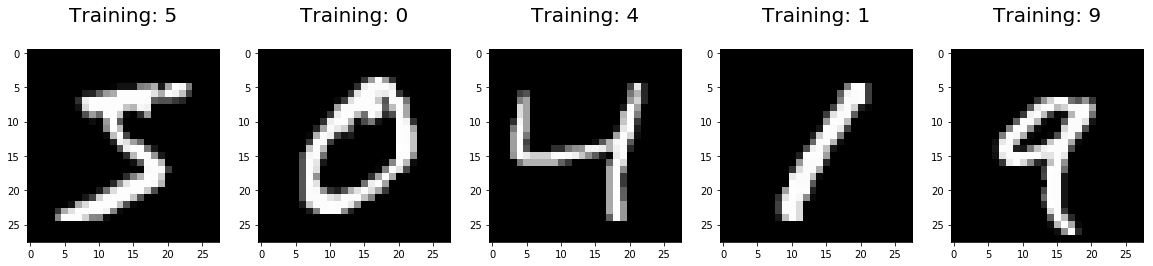

In [48]:
#Mostrando Digitos t Labels Entrenados

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


In [49]:

# This is how the computer sees the number 5
print(train_img[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [50]:
#Aplicando Regresion Logistica
from sklearn.linear_model import LogisticRegression


logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# Perceptron para clases Setosa y Versicolor 

from sklearn.linear_model import Perceptron
# Se aplica Perceptron #
ppn=Perceptron(max_iter=40,eta0=0.1,random_state=1)
ppn.fit(train_img, train_lbl)





Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# Adaline - Linear Regressor para clases Setosa y Versicolor 

from sklearn import linear_model

ada = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
ada.fit(train_img, train_lbl)



In [0]:

# Logistic Regression para clases Setosa y Versicolor

from sklearn.linear_model import LogisticRegression
# Se aplica Logictic Regression
log_reg = LogisticRegression()
log_reg.fit(train_img, train_lbl)
